In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data file and check size
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [85]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

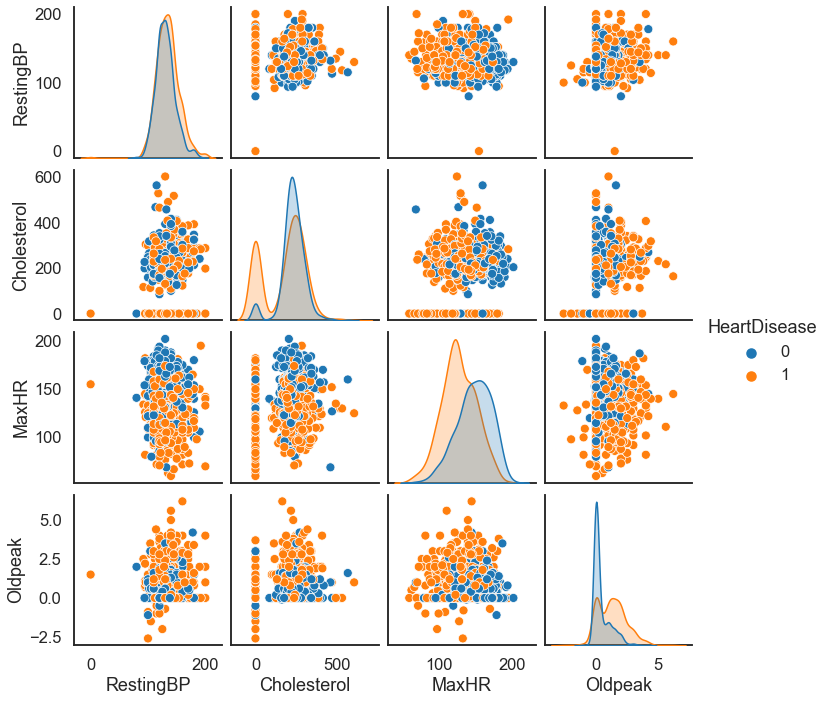

In [88]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')

In [14]:
# For logistic regression and svm, we encode the catagorical data and scale them to (0, 1), save in data_encoded
data['Sex'].replace('M', 0, inplace=True)
data['Sex'].replace('F', 1, inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
data['ExerciseAngina'].replace('N', 0, inplace=True)
data['ExerciseAngina'].replace('Y', 1, inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [22]:
data = pd.get_dummies(data, columns = ['ChestPainType'], prefix='PainType')
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PainType_ASY,PainType_ATA,PainType_NAP,PainType_TA
0,40,0,140,289,0,Normal,172,0,0.0,Up,0,0,1,0,0
1,49,1,160,180,0,Normal,156,0,1.0,Flat,1,0,0,1,0
2,37,0,130,283,0,ST,98,0,0.0,Up,0,0,1,0,0
3,48,1,138,214,0,Normal,108,1,1.5,Flat,1,1,0,0,0
4,54,0,150,195,0,Normal,122,0,0.0,Up,0,0,0,1,0


In [23]:
data = pd.get_dummies(data, columns = ['RestingECG'], prefix='RestingECG')
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PainType_ASY,PainType_ATA,PainType_NAP,PainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,0,140,289,0,172,0,0.0,Up,0,0,1,0,0,0,1,0
1,49,1,160,180,0,156,0,1.0,Flat,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,Up,0,0,1,0,0,0,0,1
3,48,1,138,214,0,108,1,1.5,Flat,1,1,0,0,0,0,1,0
4,54,0,150,195,0,122,0,0.0,Up,0,0,0,1,0,0,1,0


In [24]:
data = pd.get_dummies(data, columns = ['ST_Slope'], prefix='ST_Slope')
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,PainType_ASY,PainType_ATA,PainType_NAP,PainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [25]:
data.shape

(918, 19)

In [27]:
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,PainType_ASY,PainType_ATA,PainType_NAP,PainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


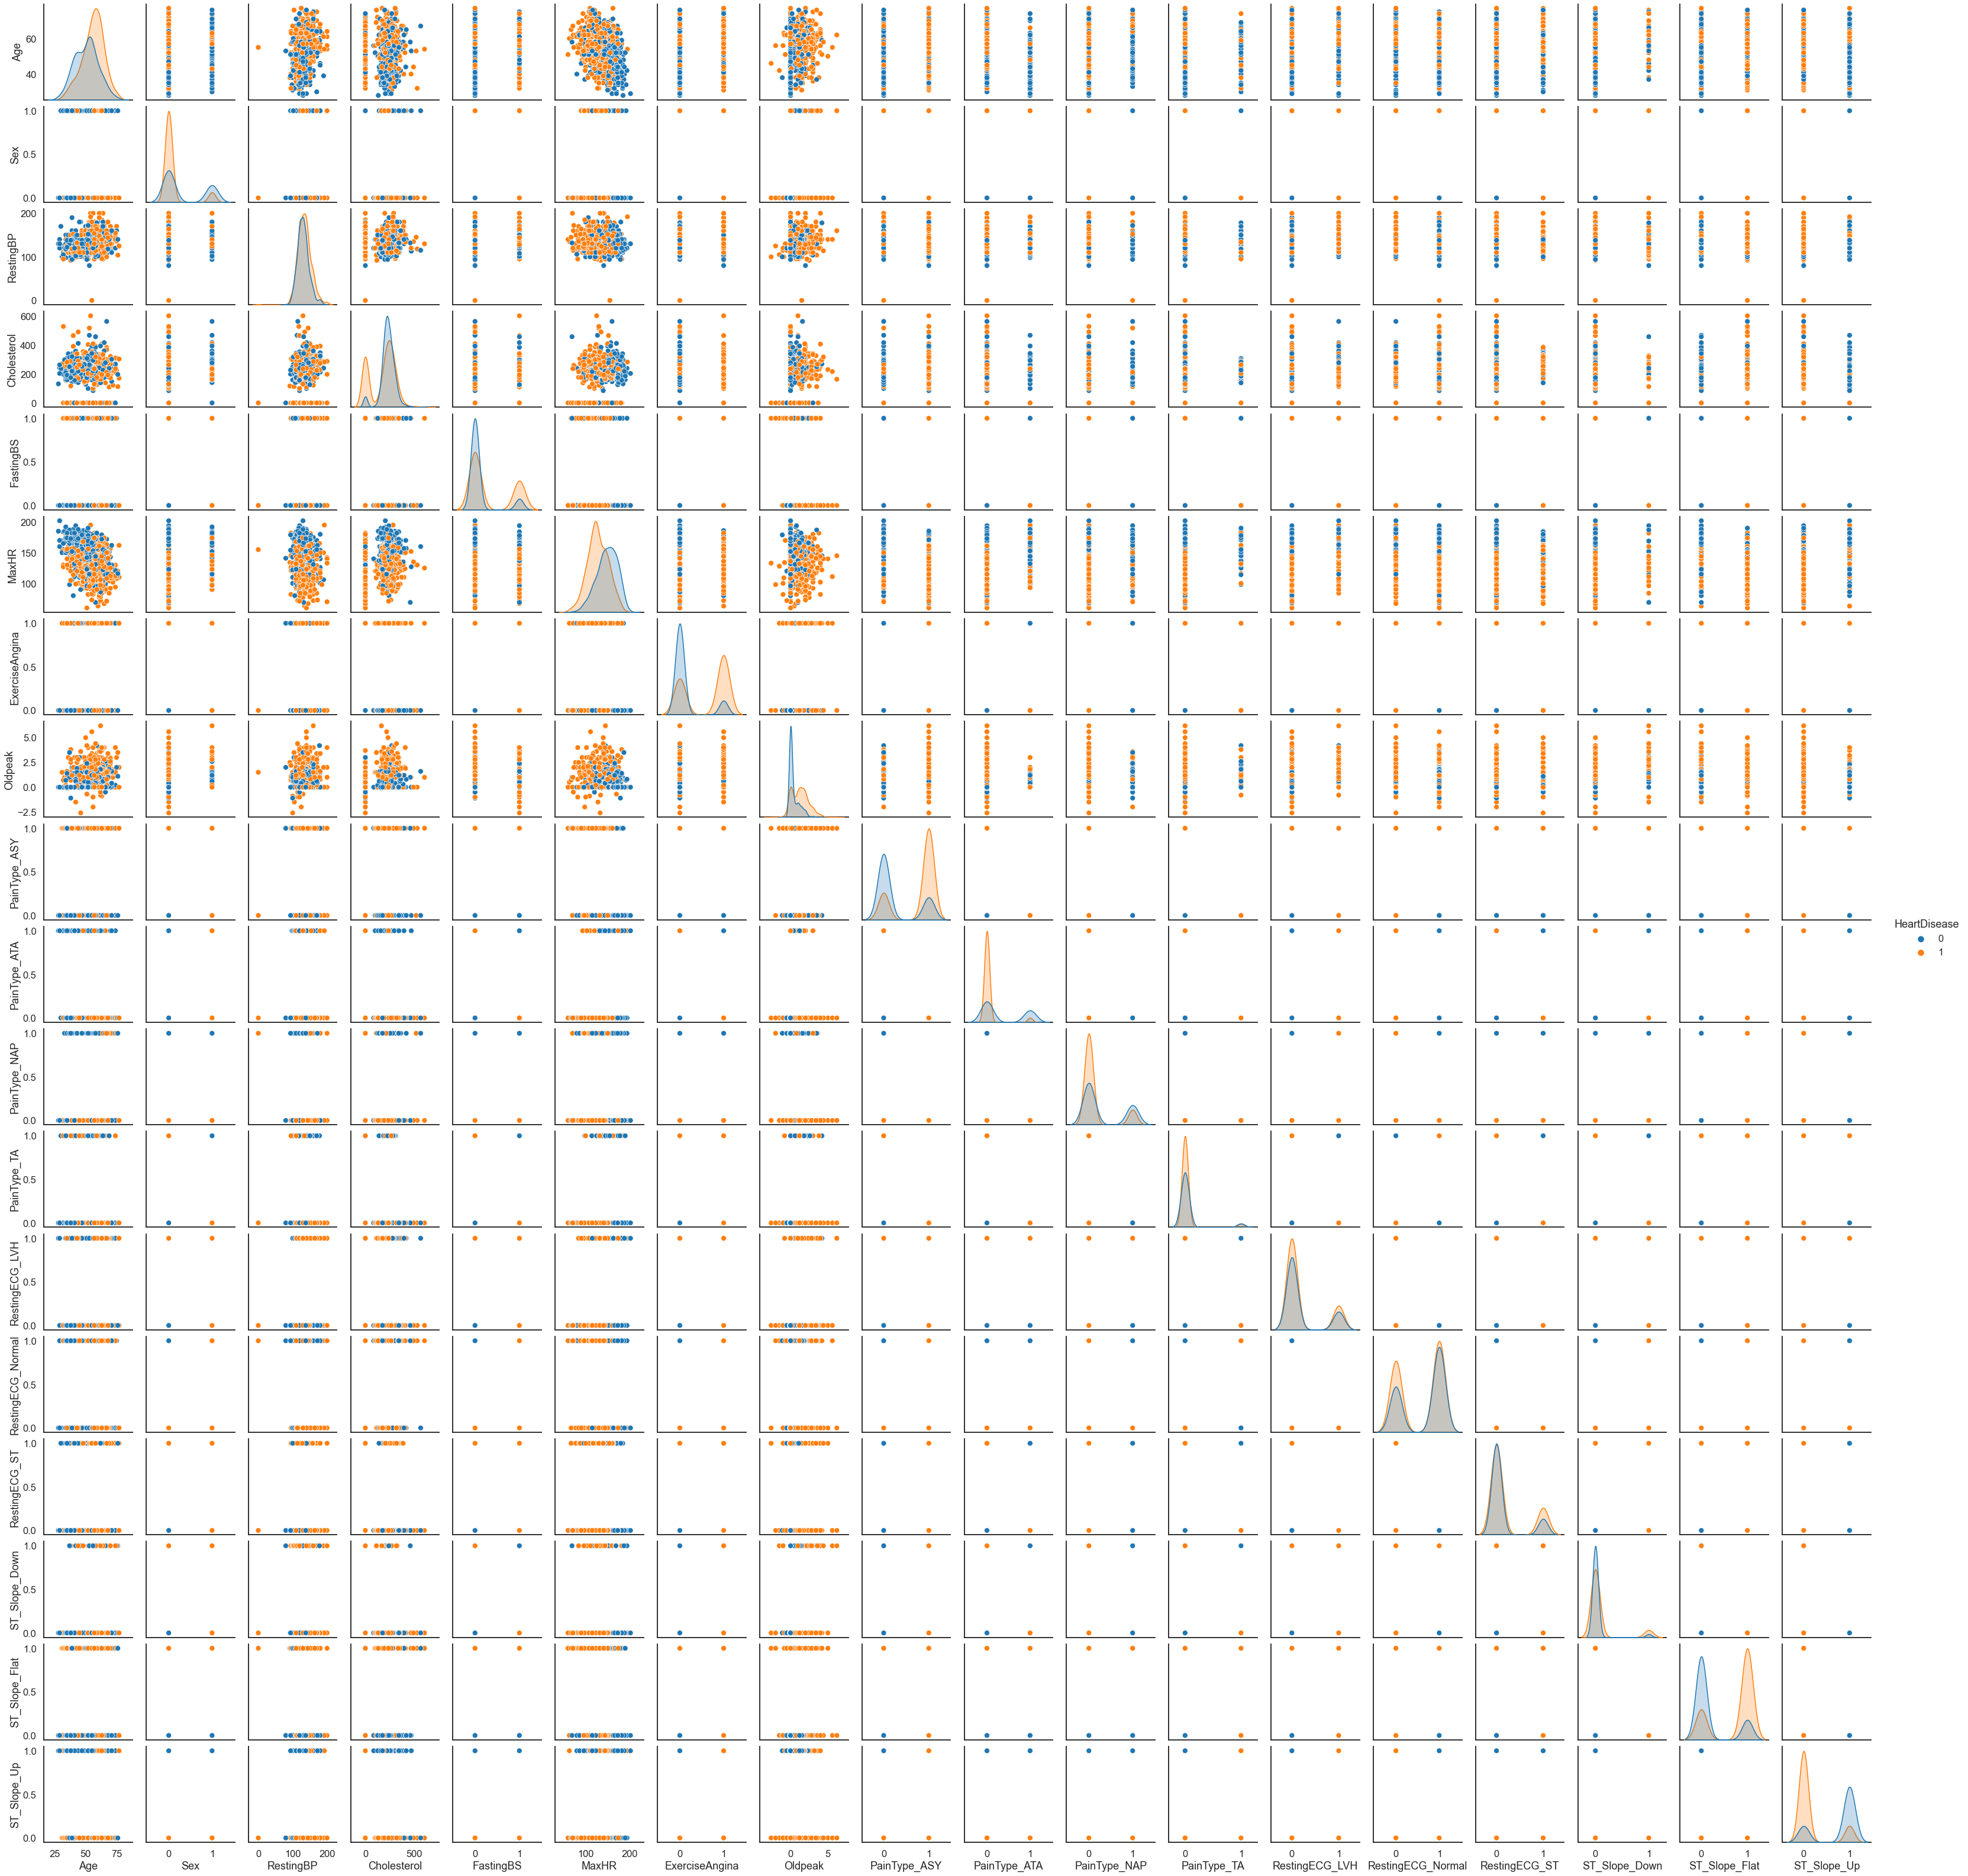

In [28]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data, hue='HeartDisease')

In [74]:
import matplotlib.pyplot as plt

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on heart disease problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.loc[:, data.columns != 'HeartDisease']
y = data['HeartDisease']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize r, R, theta, and Energy (train)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

len(X_test)

230

In [75]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score

lr_clf = LogisticRegression(random_state=42, C=10.0).fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr_clf.predict(X_test_s)
y_pred_p = lr_clf.predict_proba(X_test_s)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

accuracy is 0.861
f1 score is 0.875
roc-auc is 0.937
Confusion Matrix: 
[[ 86  12]
 [ 20 112]]


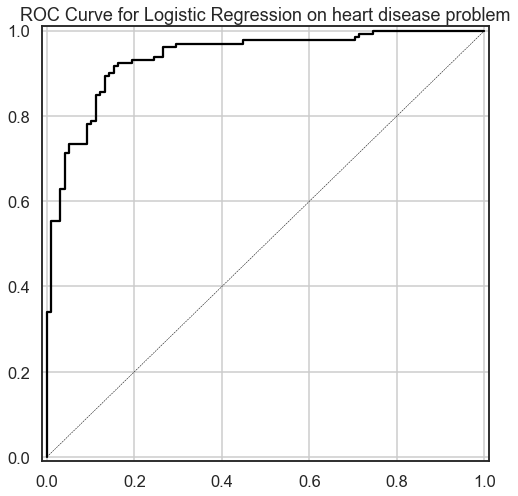

In [76]:
plot_roc(y_test, y_pred_p[:, 1], 'Logistic Regression')

In [56]:
# SVM with Gaussian kernel
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score

svm_clf = SVC(kernel='rbf', gamma=1.0, C=10.0, probability=True).fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = svm_clf.predict(X_test_s)
y_pred_p = svm_clf.predict_proba(X_test_s)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

accuracy is 0.748
f1 score is 0.810
roc-auc is 0.892
Confusion Matrix: 
[[ 48  50]
 [  8 124]]


In [77]:
# Benchmark SVM using CV
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[10, 20], 'gamma':(0.001, 0.01, 0.1, 1)}
svm_clf_gscv = GridSearchCV(svm, parameters)

svm_clf_gscv.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = svm_clf_gscv.predict(X_test_s)
y_pred_p = svm_clf_gscv.predict_proba(X_test_s)

print('Model is: ')
print(svm_clf_gscv.best_params_)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Model is: 
{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy is 0.865
f1 score is 0.878
roc-auc is 0.932
Confusion Matrix: 
[[ 87  11]
 [ 20 112]]


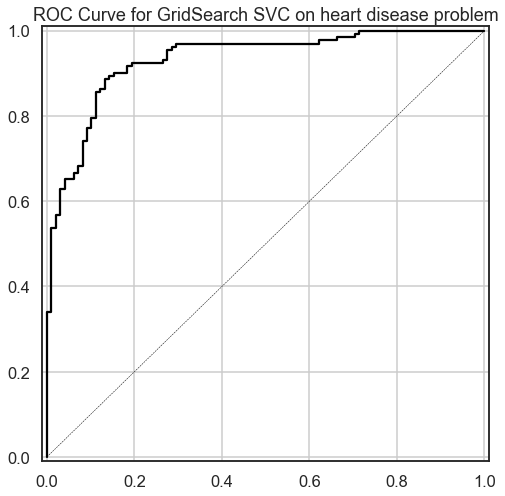

In [78]:
plot_roc(y_test, y_pred_p[:, 1], 'GridSearch SVC')

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500)

rf_clf.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = rf_clf.predict(X_test_s)
y_pred_p = rf_clf.predict_proba(X_test_s)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

accuracy is 0.878
f1 score is 0.891
roc-auc is 0.946
Confusion Matrix: 
[[ 87  11]
 [ 17 115]]


In [83]:
# Benchmark RandomForest using CV
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {'criterion':('gini', 'entropy'), 'n_estimators':(100, 200, 300, 400, 500, 1000), 'max_features':(2, 3)}
rf_clf_gscv = GridSearchCV(rf, parameters)

rf_clf_gscv.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = rf_clf_gscv.predict(X_test_s)
y_pred_p = rf_clf_gscv.predict_proba(X_test_s)

print('Model is: ')
print(rf_clf_gscv.best_params_)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Model is: 
{'criterion': 'gini', 'max_features': 2, 'n_estimators': 200}
accuracy is 0.891
f1 score is 0.903
roc-auc is 0.945
Confusion Matrix: 
[[ 88  10]
 [ 15 117]]


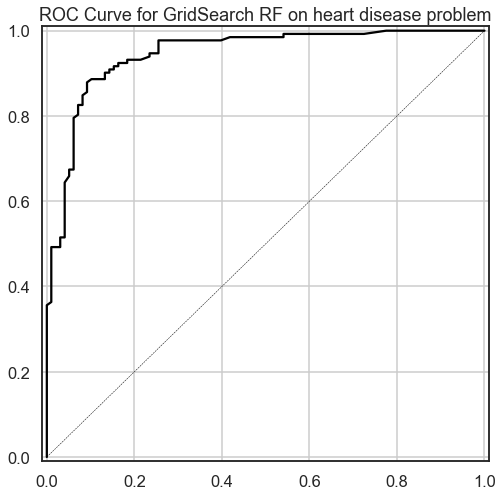

In [84]:
plot_roc(y_test, y_pred_p[:, 1], 'GridSearch RF')